In [137]:
import sys
import os
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
import itertools
import pdb
from scipy.optimize import curve_fit
from copy import copy, deepcopy
import matplotlib.pyplot as plt
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from SPAM import *
from data_analysis import *
import json


In [138]:

import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
import EAB_process_modified 
from EAB_CB_data_analysis import *
import bootstrap

In [139]:
Set_Mapping([4,5,3,2,1,])
nqubit=2
C=20
all_circuits={}
depth=[2,8,32]
shots=2000

load circuits and save them into a dictionary with the following stucture:
all_circuits={}
              -XX
                  -2=[list]
                  -8=[list]
                  -32=[list]
              -XY
                  -2
                  -8
                  -32
              ...

load all data file name into a dictionary
all_data={}
              -XX
                  -2=[list of data filenames]
                  -8=[list of data filenames]
                  -32=[list of data filenames]
              -XY
                  -2
                  -8
                  -32
              ...

load circuit

In [140]:
pauli_sample_list = [''.join(s) for s in itertools.product(['X','Y','Z'], repeat = nqubit)]
circ_path="/Users/yzhu/yzhu_work/gates projects/EAB/circuits/04222024/FTXX45/"

for pauli in pauli_sample_list:
    all_circuits[pauli]={}

for f in os.listdir(circ_path):
    if (f.find(".txt")!=-1):
        n=f.find("_")
        n1=f.find(".")
        Plabel=f[n-2:n]
#         print(Plabel)
        dlabel=f[n+3:n1]
#         print (dlabel)x
        
        file=open(circ_path+f)
        Lines= file.readlines()
#         c_d8=[]
        all_circuits[Plabel][int(dlabel)]=[]
        count = 0
        for line in Lines:
            all_circuits[Plabel][int(dlabel)].append(line)
            count += 1


    
# print (all_circuits["XY"][2])
# print (depth)
# all_circuits=[]
# all_circuits=CB_load_circuit(nqubit,C,depth,pauli_sample_list,circ_path)
# print (all_circuits["XY"])

# load data 

In [141]:
data_path="/Users/yzhu/yzhu_work/gates projects/EAB/data/0927 FTXX45 CB/"
all_datafile={}
all_datafile_ordered={}

for pauli in pauli_sample_list:
    all_datafile[pauli]={}
    for d in depth:
        all_datafile[pauli][d]=[]
for pauli in pauli_sample_list:
    all_datafile_ordered[pauli]={}
    for d in depth:
        all_datafile_ordered[pauli][d]=[]

for folder in os.listdir(data_path):
    if folder!=".DS_Store" and folder!="data processed":
        for folder2 in os.listdir(data_path+folder+"/"):
            if folder2=="2" or folder2=="8" or folder2=="16" or folder2=="32" or folder2=="40":
                for f in os.listdir(data_path+folder+"/"+folder2+"/"):
                    if f!=".DS_Store":
                        all_datafile[folder][int(folder2)].append(f)
                        # print (f)
#                 print (len(all_datafile[folder][int(folder2)]))
# print (all_datafile)  
L1=[]
line_Idx="000"
line_num=""
p=0 #position indicator
for pauli in pauli_sample_list:
    for d in depth:
        for f in all_datafile[pauli][d]:
#             print (f)
            if (f.find("Line")!=-1):
                n=f.find("_")
                line_Idx=f[n+6:n+9]
                for i in range(3):
                    if line_Idx[i]=="0":
                        p+=1
                    else:
                        line_num=line_Idx[p:3]
                        p=0
                        break
                L1.append(int(line_num))
                # print (line_num)
            else:
                print (f) #print out non datafiles just for debugging 
                continue
        # print (L1)
        # print (all_datafile[pauli][d])
        for Idx in range (len(all_datafile[pauli][d])):
            for i in range (len(L1)):
                # print (i)
                # print (L1)
                if L1[i]==Idx+1:
                    all_datafile_ordered[pauli][d].append(all_datafile[pauli][d][i])
                    break
        L1=[]
        line_Idx="000"
        line_num=""
        p=0 #position indicator

In [142]:
# a=Quantum_State(5)

a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

a=Quantum_State(5)
a2=Quantum_State(5)
# a_2=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


2024-09-30-173642_Line_001.txt
[0.9154999999999999, 0.043000000000000003, 0.0155, 0.026000000000000002]
RX-42:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+42

2024-09-30-173710_Line_002.txt
[0.032, 0.8839999999999999, 0.0165, 0.0675]
RX-42:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RX+42

2024-09-30-173738_Line_003.txt
[0.0325, 0.9049999999999999, 0.021, 0.0415]
RX-42:RY+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+42

2024-09-30-1738

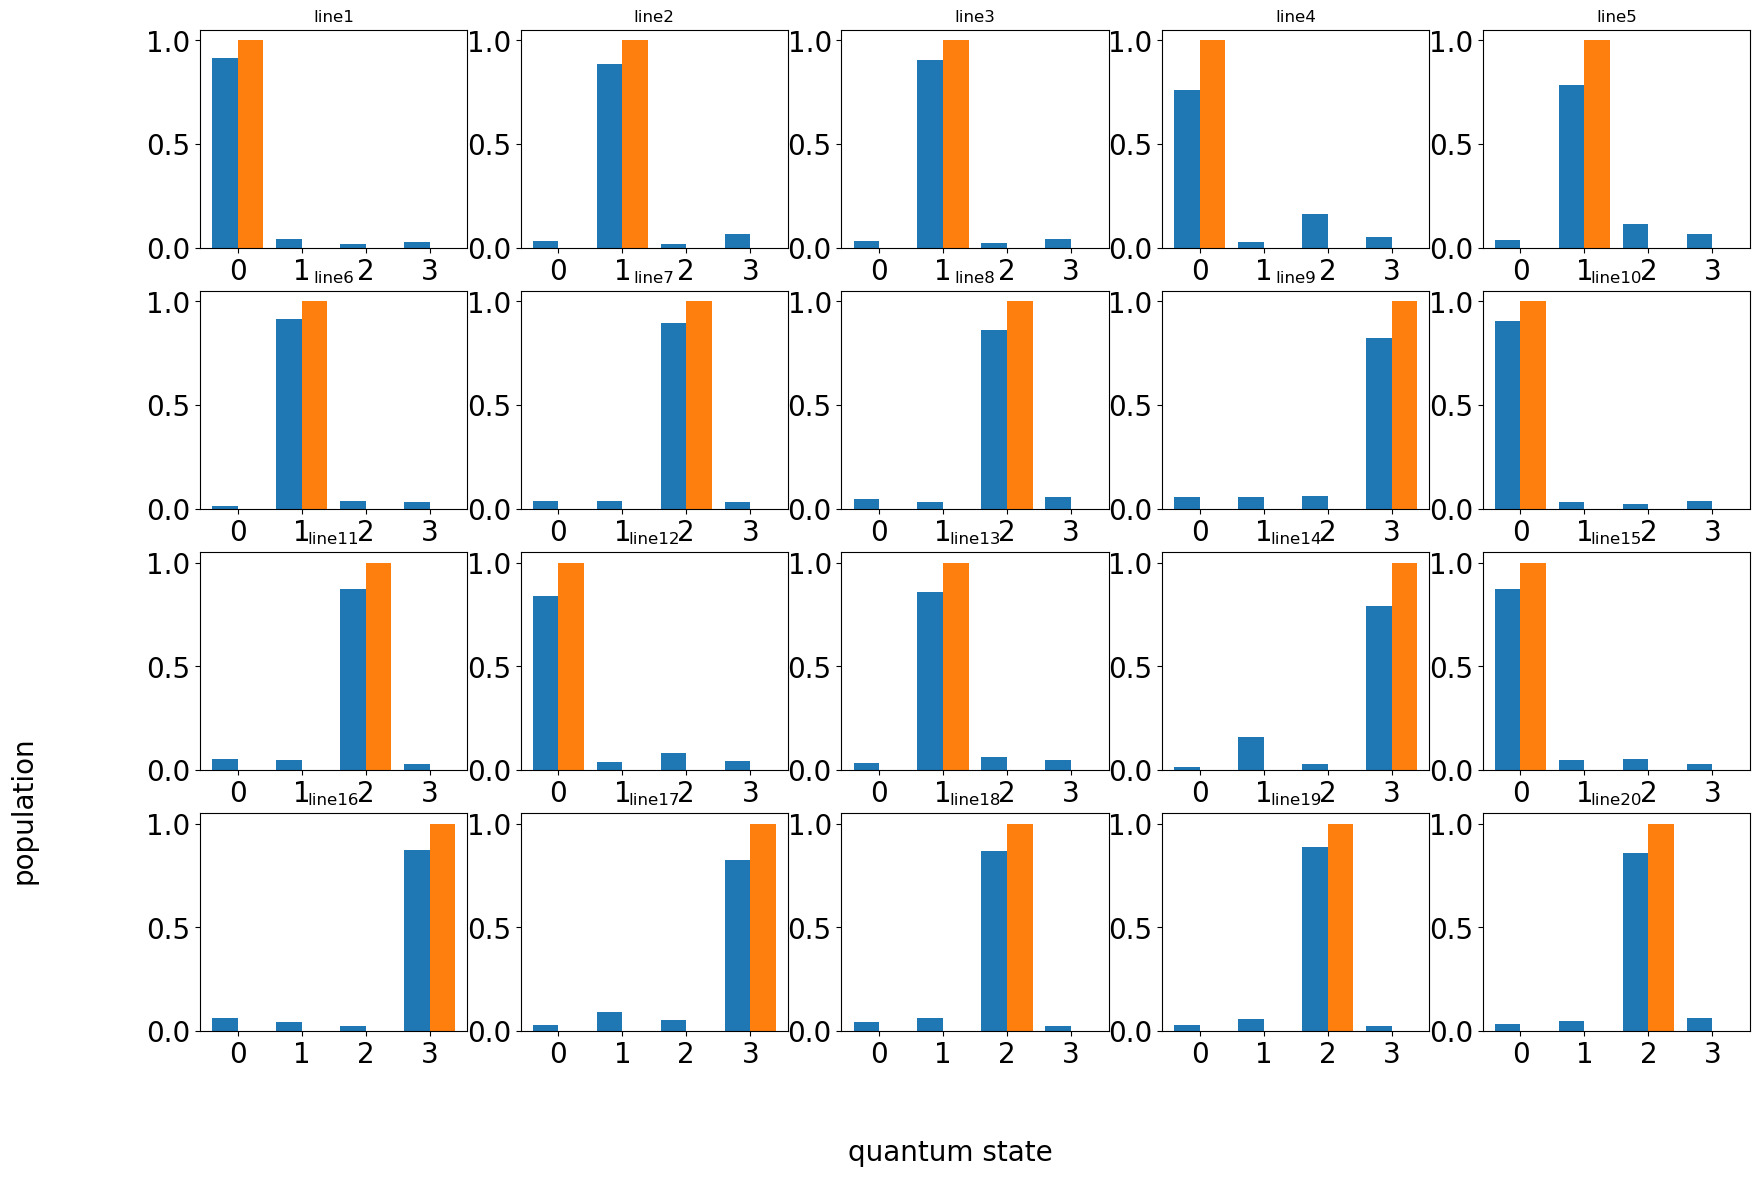

In [132]:
filenames_data=[]
circuit=[]
PauliLabel="ZY"
DepthIndex_list=[8]
for DepthIndex in DepthIndex_list:
    filenames_data=all_datafile_ordered[PauliLabel][DepthIndex]
    paf_data=data_path+PauliLabel+"/"+str(DepthIndex)+"/"
    circuit=all_circuits[PauliLabel][DepthIndex]

    # For plotting: using the variable axs for multiple Axes
    fig, axs = plt.subplots(4, 5)
    fig.set_figwidth(20)
    fig.set_figheight(13)
    fig.text(0.5, 0.01, 'quantum state', ha='center',fontsize=20)
    fig.text(0.03, 0.28, 'population', va='center', rotation='vertical',fontsize=20)
    plt.rcParams.update({'font.size': 10})
    p=0 #subplot row
    q=0 #subplot col
    X=["0","1","2","3"]
    X_axis = np.arange(len(X)) 


    for i in range (len(filenames_data)):
        print (filenames_data[i])
        a.Import(paf_data+filenames_data[i],keep_file=True)
        data_traced=Trace_Out(a,[0,1])
        print (data_traced.population)

        # a2.Import(paf_data_d8_compare+filenames_d8_compare[i],keep_file=True)
        # data2_traced=Trace_Out(a2,[0,1])
        # print (data2_traced.population)

        b_c.Interpret_GatesLab_Sequence(circuit[i])
        print (circuit[i])
        b=b_c.Simulate()
        sim_traced=Trace_Out(b,[0,1])
    
        # axs[p,q].bar(X_axis -0.6, data_traced.population, 0.4, label = 'data_traced') 
        # axs[p,q].bar(X_axis - 0.2, data2_traced.population, 0.4, label = 'data2_traced') 
        # axs[p,q].bar(X_axis + 0.2, sim_traced.population, 0.4, label = 'sim_traced') 
        axs[p,q].bar(X_axis -0.2, data_traced.population, 0.4, label = 'data_traced') 
        axs[p,q].bar(X_axis + 0.2, sim_traced.population, 0.4, label = 'sim_traced')
        
        
        axs[p,q].set_xticks(X_axis, X) 
        axs[p,q].set_title ("line"+str(i+1))
        # Display_States_Population(states=[data_traced,data2_traced,sim_traced],label=["data_traced 0927","data_traced 0930","sim_traced"])
        q+=1 
        if q > 5 or q==5 :
            q=0
            p+=1
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])


# formatting data for saving


In [143]:
pauli_sample_select_list=["XX","XY","XZ","YX","YY","YZ","ZX","ZY","ZZ"]  # pauli terms with data 


In [144]:
filenames_data=[]
circuit=[]
counts=[]
all_counts={}

pauli_sample_select_list=pauli_sample_list
# paf_data="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023alldata/"
for PauliLabel in pauli_sample_select_list:
    all_counts[PauliLabel]={}
    for DepthIndex in depth:
        all_counts[PauliLabel][DepthIndex]=[]
        filenames_data=all_datafile_ordered[PauliLabel][DepthIndex]
        paf_data=data_path
        paf_data+=PauliLabel+"/"+str(DepthIndex)+"/"
        circuit=all_circuits[PauliLabel][DepthIndex]


        for i in range (len(filenames_data)):
            # print (filenames_data[i])
            a.Import(paf_data+filenames_data[i],keep_file=True)
            data_traced=Trace_Out(a,[0,1])
            counts=[round(shots*x) for x in  data_traced.population]
            # print ("counts:", counts)
            counts_ibm_mapping, counts_ibm_mapping_dic=counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping_no_ancilla(counts,nqubit)
#             print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
            all_counts[PauliLabel][DepthIndex].append(counts_ibm_mapping_dic)

   
print ("done")

done


In [134]:
import copy
from copy import copy, deepcopy
import itertools
with open("/Users/yzhu/yzhu_work/gates projects/EAB/circuits/04222024/FTXX45/sim_cb_20240422_FTXX45_3716099127", "rb") as fp:   # Unpickling
    cb_load = pickle.load(fp)
cb_load_cpy=deepcopy(cb_load)
pauli_sample_list = [''.join(s) for s in itertools.product(['X','Y','Z'], repeat = nqubit)]
for PauliLabel in pauli_sample_list:
    #only copy the layer for which there is data, in this case [2,8,32]. Needs to be changed if depths changes 
    cb_load_cpy[PauliLabel]["result"]=cb_load_cpy[PauliLabel]["result"][0:20]+cb_load_cpy[PauliLabel]["result"][40:60]+cb_load_cpy[PauliLabel]["result"][80:100]
for PauliLabel in pauli_sample_select_list:
    # print (PauliLabel)
    for j in range (len(depth)):
        for i in range (C*j, C*(j+1)):
            cb_load_cpy[PauliLabel]["result"][i]["counts"]=all_counts[PauliLabel][depth[j]][i-C*j]
cb_load_cpy["pauli_sample_list"]=pauli_sample_select_list   

# save file

In [135]:
filename = str(uuid.uuid4())
filename+="CB_data_XX_0930_processed_full_set_new0930XX"
with open("/Users/yzhu/yzhu_work/gates projects/EAB/data/0927 process/"+filename, "wb") as fp:
    pickle.dump(cb_load_cpy, fp)


In [136]:
print ("done")

done


Data analysis

plot average fidelity and fit

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:

b=[]
c=[1,2]
f=c
c=[1]
print (d)
print (b)
print (c)

In [ ]:
for i in range(20,40):
    print (i)

In [ ]:
l=[1,2,3]
print (l[0:2])

In [72]:
int(5/2)

2